In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

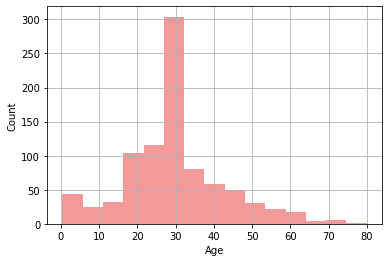

In [39]:
ax = df["Age"].hist(bins=15, color='lightcoral', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [8]:
df["Age"].median(skipna=True)

28.0

In [9]:
#Data "Age" yang kosong, diisi dengan angka mediannya, yaitu 28.
#Data "Embarked" yang kosong, diisi dengan modenya, yaitu "S".
#Data "Cabin" ditakeout dari variabel, karena terlalu banyak value yang kosong.

titanic_df = df
titanic_df["Age"].fillna(28, inplace=True)
titanic_df["Embarked"].fillna("S", inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)

### Numbers of Survived and Dead Passengers

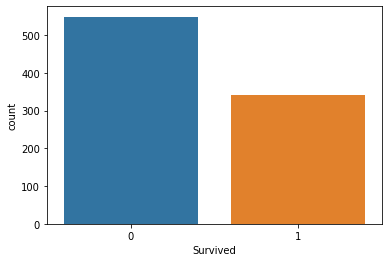

In [33]:
sns.countplot("Survived", data = titanic_df)

The numbers of dead passengers were more than survived passengers

### Exploration of Sex Variable

In [24]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


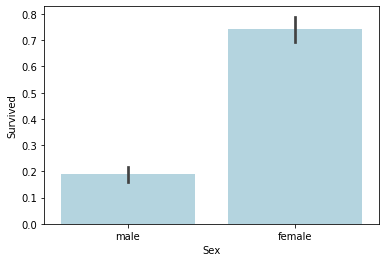

In [38]:
sns.barplot('Sex', 'Survived', data=titanic_df, color="lightblue")
plt.show()

Survived passengers were mostly female

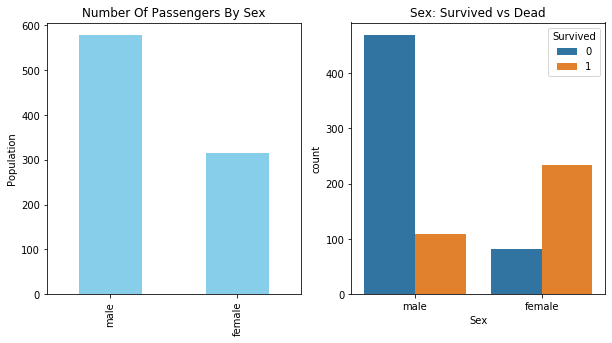

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
titanic_df["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")

sns.countplot("Sex", hue = "Survived", data = titanic_df, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

In total male passengers were more than female

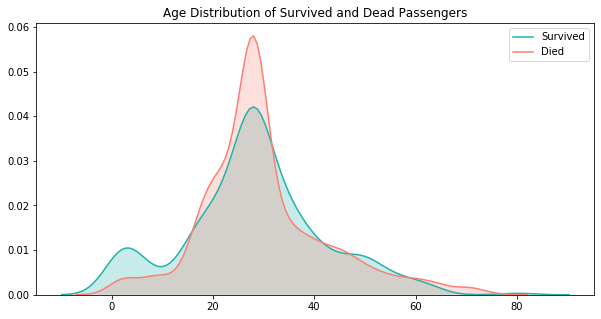

In [11]:
plt.figure(figsize=(10,5))
sns.kdeplot(titanic_df["Age"][titanic_df.Survived == 1], color="lightseagreen", shade=True)
sns.kdeplot(titanic_df["Age"][titanic_df.Survived == 0], color="salmon", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Age Distribution of Survived and Dead Passengers')
plt.show()

Age distribution of survived and dead passengers was similar, but in child age survived passengers were more than dead maybe because of child rescue priority

### Exploration of Pclass Variable

In [25]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


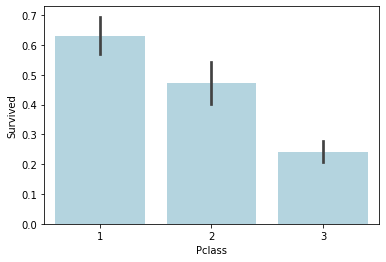

In [16]:
sns.barplot('Pclass', 'Survived', data=titanic_df, color="lightblue")
plt.show()

Pclass 1 had the most percentage of survived passengers

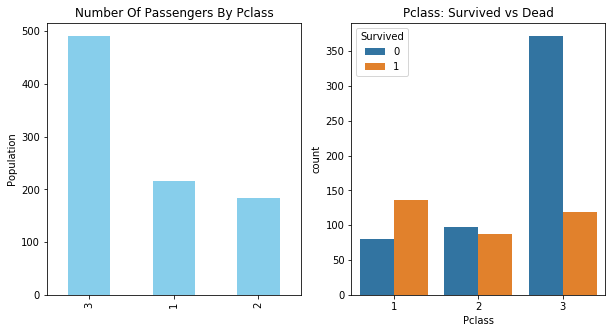

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
titanic_df["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")

sns.countplot("Pclass", hue = "Survived", data = titanic_df, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

Most of titanic passengers were in Pclass 3, also most of dead passengers were in Pclass 3

### Exploration of Embarked Variable

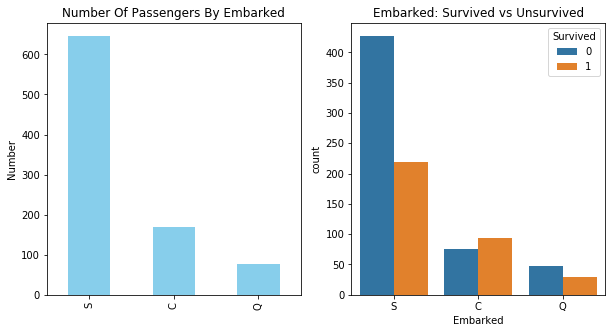

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
titanic_df["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")

sns.countplot("Embarked", hue = "Survived", data = titanic_df, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

Most of titanic passengers were embarked from Southampton, also most of dead passengers were embarked from Southampton

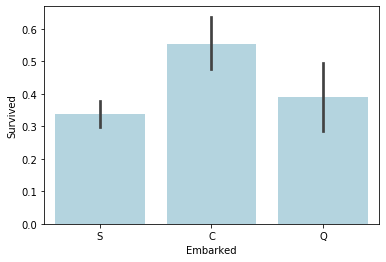

In [37]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="lightblue")
plt.show()

Passengers that embarked from Cherbourg had the most survived percentage